Colour ℓ2-TV Denoising
======================

This example demonstrates the use of class [tvl2.TVL2Denoise](http://sporco.rtfd.org/en/latest/modules/sporco.admm.tvl2.html#sporco.admm.tvl2.TVL2Denoise) for removing Gaussian white noise from a colour image using Total Variation regularization with an ℓ2 data fidelity term (ℓ2-TV denoising).

In [1]:
from __future__ import print_function
from builtins import input

import numpy as np

from sporco.admm import tvl2
from sporco import util
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()

Load reference image.

In [2]:
img = util.ExampleImages().image('monarch.png', scaled=True,
                                 idxexp=np.s_[:,160:672])

Construct test image corrupted by Gaussian white noise with a 0.05 standard deviation.

In [3]:
np.random.seed(12345)
imgn = img + np.random.normal(0.0, 0.05, img.shape)

Set regularization parameter and options for ℓ2-TV denoising solver. The regularization parameter used here has been manually selected for good performance.

In [4]:
lmbda = 0.06
opt = tvl2.TVL2Denoise.Options({'Verbose': True, 'MaxMainIter': 100,
                                'RelStopTol': 2e-2, 'gEvalY': False,
                                'AutoRho': {'Enabled': True}})

Create solver object and solve, returning the the denoised image ``imgr``.

In [5]:
b = tvl2.TVL2Denoise(imgn, lmbda, opt, caxis=2)
imgr = b.solve()

Itn   Fnc       DFid      RegTV     r         s         ρ       
----------------------------------------------------------------


   0  2.13e+03  2.74e+02  3.09e+04  6.69e-01  4.98e-01  2.20e-01


   1  1.77e+03  7.42e+02  1.72e+04  2.58e-01  1.35e-01  2.20e-01


   2  1.74e+03  8.03e+02  1.56e+04  1.47e-01  9.55e-02  3.04e-01


   3  1.70e+03  8.08e+02  1.49e+04  8.68e-02  6.54e-02  3.77e-01


   4  1.68e+03  7.98e+02  1.48e+04  5.66e-02  4.60e-02  4.35e-01


   5  1.68e+03  7.94e+02  1.47e+04  3.91e-02  3.26e-02  4.82e-01


   6  1.67e+03  7.92e+02  1.47e+04  2.82e-02  2.18e-02  4.82e-01


   7  1.67e+03  7.91e+02  1.47e+04  2.11e-02  1.70e-02  5.49e-01


   8  1.67e+03  7.90e+02  1.47e+04  1.62e-02  1.44e-02  6.11e-01
----------------------------------------------------------------


Display solve time and denoising performance.

In [6]:
print("TVL2Denoise solve time: %5.2f s" % b.timer.elapsed('solve'))
print("Noisy image PSNR:    %5.2f dB" % metric.psnr(img, imgn))
print("Denoised image PSNR: %5.2f dB" % metric.psnr(img, imgr))

TVL2Denoise solve time:  3.05 s
Noisy image PSNR:    25.96 dB
Denoised image PSNR: 33.84 dB


Display reference, corrupted, and denoised images.

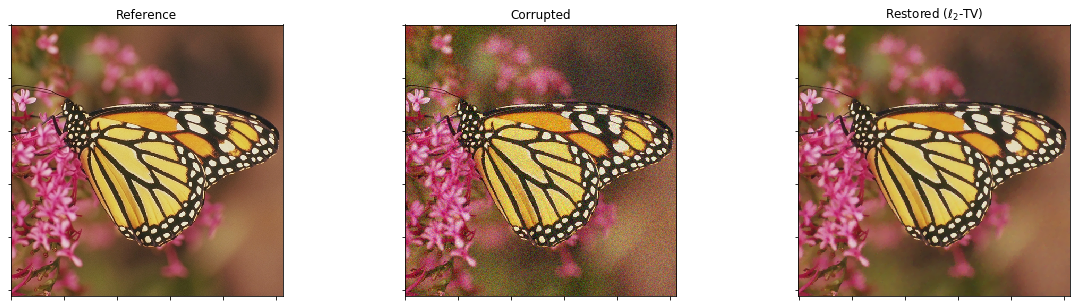

In [7]:
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.imview(img, title='Reference', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(imgn, title='Corrupted', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(imgr, title=r'Restored ($\ell_2$-TV)', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

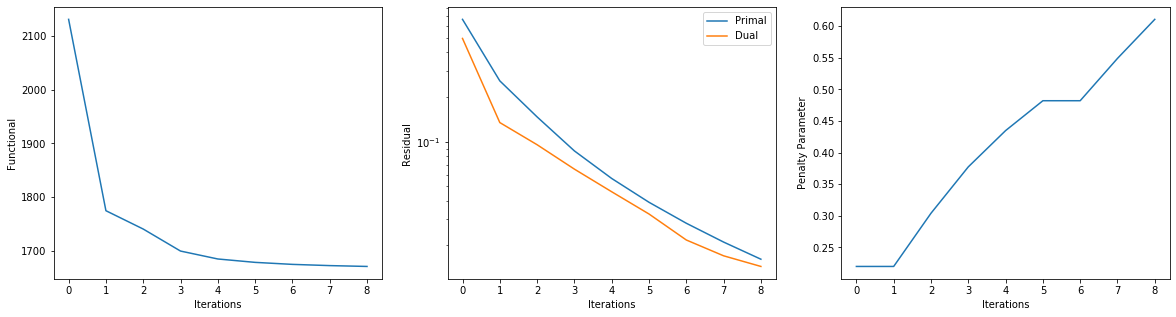

In [8]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T, ptyp='semilogy',
          xlbl='Iterations', ylbl='Residual', lgnd=['Primal', 'Dual'],
          fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()